In [98]:
import os
import requests
from datetime import datetime
import re
import json  # Para exportar el resumen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np



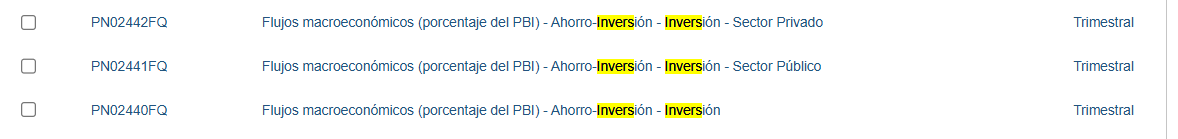

In [99]:

inicio = '2012-01'
fin = '2024-10'


fechas = pd.date_range(start=inicio, end=fin, freq='QS')


fechas_lista = [f"{fecha.year}-{(fecha.month - 1)//3 + 1}" for fecha in fechas]

print(fechas_lista)
print(len(fechas_lista))


['2012-1', '2012-2', '2012-3', '2012-4', '2013-1', '2013-2', '2013-3', '2013-4', '2014-1', '2014-2', '2014-3', '2014-4', '2015-1', '2015-2', '2015-3', '2015-4', '2016-1', '2016-2', '2016-3', '2016-4', '2017-1', '2017-2', '2017-3', '2017-4', '2018-1', '2018-2', '2018-3', '2018-4', '2019-1', '2019-2', '2019-3', '2019-4', '2020-1', '2020-2', '2020-3', '2020-4', '2021-1', '2021-2', '2021-3', '2021-4', '2022-1', '2022-2', '2022-3', '2022-4', '2023-1', '2023-2', '2023-3', '2023-4', '2024-1', '2024-2', '2024-3', '2024-4']
52


In [100]:
indices=np.linspace(440,442,(443-440))
indices=indices.tolist()
codigos=[]

for elem in indices:
    cod_gen='PN02'+str(int(elem))+'FQ'
    codigos+=[cod_gen]
print(codigos)

['PN02440FQ', 'PN02441FQ', 'PN02442FQ']


In [101]:
n_SERIES=[]
valores=[]
for codigo in codigos:
    url = f'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo}/json/{inicio}/2025_10' 
    response = requests.get(url) # la respuesta viene a ser el output de la consulta de la dirección dada por el API
    data_1=response.json() # lo almacenamos en un elemento llamado data
    #PRIMERO SE OBTIENEN LOS NOMBRES, que será tmbn el nombre de la columna
    nombre_serie=data_1['config']['series'][0]['name']
    partes = nombre_serie.split(' - ')
    print(partes)
    #partes_1=partes[1].split(' (')
    if len(partes)==4:
        nombre_extraido = partes[2]+'_'+partes[3] # TENER EN MENTE QUE NOMBRE EXTRAIDO SERA EL NOMBRE DE LA COLUMNA
    else:
        nombre_extraido = partes[2]+'_'+'total'
    n_SERIES+=[nombre_extraido] # a la lista de nombres que tendremos tmbn como un output
    #SEGUNDO SE OBTIENEN LOS VALORES REGISTRADOS
    series=data_1['periods']
    registros=[elem['values'][0] for elem in series]
    valores+=[registros] # se llena 1 elemento nuevo por cada serie
print(n_SERIES)
print(len(valores)) # son 4 porque al final contiene los valores totales en formato anual
print(fechas_lista)

['Flujos macroeconómicos (porcentaje del PBI)', 'Ahorro-Inversión', 'Inversión']
['Flujos macroeconómicos (porcentaje del PBI)', 'Ahorro-Inversión', 'Inversión', 'Sector Público']
['Flujos macroeconómicos (porcentaje del PBI)', 'Ahorro-Inversión', 'Inversión', 'Sector Privado']
['Inversión_total', 'Inversión_Sector Público', 'Inversión_Sector Privado']
3
['2012-1', '2012-2', '2012-3', '2012-4', '2013-1', '2013-2', '2013-3', '2013-4', '2014-1', '2014-2', '2014-3', '2014-4', '2015-1', '2015-2', '2015-3', '2015-4', '2016-1', '2016-2', '2016-3', '2016-4', '2017-1', '2017-2', '2017-3', '2017-4', '2018-1', '2018-2', '2018-3', '2018-4', '2019-1', '2019-2', '2019-3', '2019-4', '2020-1', '2020-2', '2020-3', '2020-4', '2021-1', '2021-2', '2021-3', '2021-4', '2022-1', '2022-2', '2022-3', '2022-4', '2023-1', '2023-2', '2023-3', '2023-4', '2024-1', '2024-2', '2024-3', '2024-4']


In [102]:
columnas=['Fecha']+n_SERIES
datos=[fechas_lista]+valores
#print(len(datos))

dic_data={}

for i in range(len(datos)): # se arma el diccionario con la data correspondiente a cada columna
    dic_data[columnas[i]]=datos[i]
#print(len(dic_data))

df=pd.DataFrame(dic_data,columns=columnas)
df = df.apply(pd.to_numeric, errors='coerce')
df['Fecha'] = fechas_lista
df


,Fecha,Inversión_total,Inversión_Sector Público,Inversión_Sector Privado
0,2012-1,20.871228,3.221026,17.650202
1,2012-2,24.888140,4.107710,20.780430
2,2012-3,24.825873,5.058029,19.767843
3,2012-4,25.185426,8.861222,16.324204
4,2013-1,24.484619,3.511167,20.973451
5,2013-2,26.057961,4.974155,21.083807
6,2013-3,25.275451,5.698468,19.576983
7,2013-4,26.063648,8.500497,17.563152
8,2014-1,23.882111,3.710249,20.171862
9,2014-2,24.463503,4.679104,19.784399


In [103]:
df_1=df.copy()
# Extraer solo el año como entero
df_1['Año'] = df_1['Fecha'].str.split('-').str[0].astype(int)

# Agrupar por año y calcular el promedio
df_promedios_anuales = df_1.groupby('Año').mean(numeric_only=True)

# Mostrar los promedios anuales
df_promedios_anuales


,Inversión_total,Inversión_Sector Público,Inversión_Sector Privado
Año,,,
2012,23.942667,5.311997,18.630670
2013,25.470420,5.671072,19.799348
2014,24.577178,5.432275,19.144903
2015,23.745121,4.907554,18.837567
2016,21.834532,4.769387,17.065144
2017,20.305456,4.486043,15.819413
2018,21.065792,4.651014,16.414778
2019,20.267223,4.478986,15.788237
2020,17.864712,3.976866,13.887846


In [106]:
# GUARDAMOS AMBOS DATA FRAMES
df_promedios_anuales
df
directorio='C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/outputs'
os.chdir(directorio)
df.to_excel('INVERSION(%PBI)_trimestral.xlsx',index=True)
df_promedios_anuales.to_excel('INVERSION(%PBI)_anual.xlsx',index=True)


In [105]:
codigo=codigos[2]
url = f'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo}/json/{inicio}/2025_10' 
response = requests.get(url) # la respuesta viene a ser el output de la consulta de la dirección dada por el API
data_1=response.json() # lo almacenamos en un elemento llamado data
print(data_1)
nombre_serie=data_1['config']['series'][0]['name']
print(nombre_serie)
partes = nombre_serie.split(' - ')
print(len (partes))
print(partes[2]+'_'+partes[3])
nombre_extraido=partes[2]+'_'+partes[3]
series=data_1['periods']
registros=[elem['values'][0] for elem in series]
print(registros)
print(len(registros))

{'config': {'title': 'Flujos macroeconómicos (porcentaje del PBI)', 'series': [{'name': 'Flujos macroeconómicos (porcentaje del PBI) - Ahorro-Inversión - Inversión - Sector Privado', 'dec': '1'}]}, 'periods': [{'name': 'T1.12', 'values': ['17.6502018618422']}, {'name': 'T2.12', 'values': ['20.7804300524195']}, {'name': 'T3.12', 'values': ['19.7678434256467']}, {'name': 'T4.12', 'values': ['16.3242039250055']}, {'name': 'T1.13', 'values': ['20.9734513120923']}, {'name': 'T2.13', 'values': ['21.083806843026']}, {'name': 'T3.13', 'values': ['19.57698255033']}, {'name': 'T4.13', 'values': ['17.5631515944699']}, {'name': 'T1.14', 'values': ['20.1718623317476']}, {'name': 'T2.14', 'values': ['19.784399494478']}, {'name': 'T3.14', 'values': ['18.6350180795367']}, {'name': 'T4.14', 'values': ['17.9883320334147']}, {'name': 'T1.15', 'values': ['21.0924338366332']}, {'name': 'T2.15', 'values': ['20.0456720672751']}, {'name': 'T3.15', 'values': ['18.1832163500662']}, {'name': 'T4.15', 'values': [